In [19]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.table as table
import scipy.optimize as optimize
import astropy.constants as const

In [38]:
# global parameters
redshift = 0.014353
line_wavelength = 7774

In [75]:
def model(continuum, amplitude, sigma, velocity, wavelength):
    # velocity in km/s
    z = velocity*1e3/(const.c.si.value)
    center = line_wavelength*(1+z)
    x = wavelength
    return continuum - amplitude/sigma/np.sqrt(2*np.pi)*np.exp(-(x - center)**2/2/sigma**2)

# fitting code
def fit(wavelength, flux, wlen_range):
    idx = np.logical_and(wavelength > wlen_range[0], wavelength < wlen_range[1])
    def func(p):
        continuum, amplitude, sigma, velocity = p[0], p[1], p[2], p[3]
        model_flux = model(continuum, amplitude, sigma, velocity, wavelength[idx])
        return np.sum(np.abs(model_flux - flux[idx])**2)
    
    bounds = [
        (1, 1000),
        (0, 50000),
        (10, 500),
        (-30e3, 30e3)
    ]
    result = optimize.differential_evolution(func, bounds)
    print(result)
    return result.x

In [32]:
# plotting routine
def plot(wavelength, flux, p, wlen_range):
    idx = np.logical_and(wavelength > wlen_range[0], wavelength < wlen_range[1])
    plt.plot(wavelength[idx], flux[idx], label='Observed')
    continuum, amplitude, sigma, velocity = p[0], p[1], p[2], p[3]
    plt.plot(wavelength[idx], model(continuum, amplitude, sigma, velocity, wavelength[idx]), label='Fit')
    plt.legend()

     fun: 22.774926775493878
     jac: array([ 1.06581410e-06,  0.00000000e+00, -1.77635684e-06,  0.00000000e+00])
 message: 'Optimization terminated successfully.'
    nfev: 2605
     nit: 41
 success: True
       x: array([ 5.77189727e+00,  1.64777219e+03,  4.35802832e+02, -8.53916424e+03])


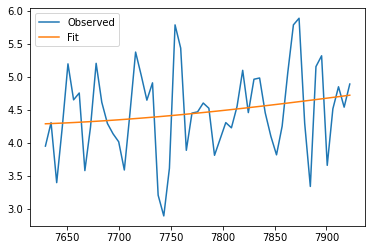

In [76]:
# NTT spectrum
spec = table.Table.read('tns_2019odp_2019-08-23_05-23-25_ESO-NTT_EFOSC2-NTT_ePESSTO+.asci', format='ascii')
wavelength, flux = spec['col1']/(1+redshift), spec['col2']*1e17
wlen_range = (line_wavelength-150, line_wavelength+150)
p = fit(wavelength, flux, wlen_range)
plot(wavelength, flux, p, wlen_range)

     fun: 251.56475821959276
     jac: array([ 4.17799129e-04, -3.97903932e-05,  1.42108547e-05, -5.68434189e-06])
 message: 'Optimization terminated successfully.'
    nfev: 2925
     nit: 46
 success: True
       x: array([   35.66405309, 30425.72128614,   437.39332006, -9042.06959742])


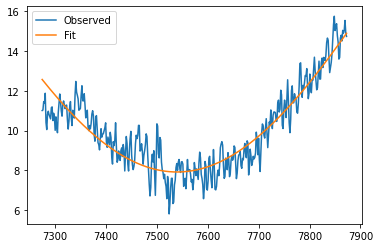

In [77]:
# first P200 spectrum
spec = table.Table.read('../data/specs/ZTF19abqwtfu_20190827_P200_v1.ascii', format='ascii')
wavelength, flux = spec['col1']/(1+redshift), spec['col2']*1e17
wlen_range = (line_wavelength-500, line_wavelength+100)
p = fit(wavelength, flux, wlen_range)
plot(wavelength, flux, p, wlen_range)

     fun: 326.6008689848002
     jac: array([-6.25277607e-05,  2.61479727e-04, -1.13686838e-05,  0.00000000e+00])
 message: 'Optimization terminated successfully.'
    nfev: 3960
     nit: 63
 success: True
       x: array([   24.44304962,  2308.55735534,   116.75095603, -7870.75904502])


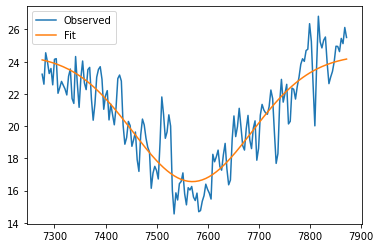

In [78]:
# first NOT spectrum
spec = table.Table.read('../data/specs/ZTF19abqwtfu_20190830_NOT_v1.ascii', format='ascii')
wavelength, flux = spec['col1']/(1+redshift), spec['col2']*1e17
wlen_range = (line_wavelength-500, line_wavelength+100)
p = fit(wavelength, flux, wlen_range)
plot(wavelength, flux, p, wlen_range)

     fun: 304.85479857948036
     jac: array([ 0.00017621,  0.00093792, -0.00189289,  0.00034106])
 message: 'Optimization terminated successfully.'
    nfev: 2610
     nit: 41
 success: True
       x: array([  218.23021403, 14949.66721253,   129.23372139, -7908.52721525])


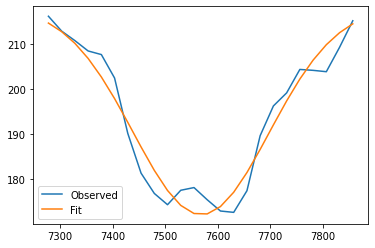

In [79]:
# P60 night+1 as NOT
spec = table.Table.read('../data/specs/ZTF19abqwtfu_20190831_P60_v1.ascii', format='ascii')
wavelength, flux = spec['col1']/(1+redshift), spec['col2']*1e17
wlen_range = (line_wavelength-500, line_wavelength+100)
p = fit(wavelength, flux, wlen_range)
plot(wavelength, flux, p, wlen_range)

<<class 'astropy.constants.codata2018.CODATA2018'> name='Speed of light in vacuum' value=299792458.0 uncertainty=0.0 unit='m / s' reference='CODATA 2018'>